## Imports

In [107]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

df_2015 = pd.read_csv("../dataset/acidentes-transito-2015.csv", parse_dates=['data'])
df_2016 = pd.read_csv("../dataset/acidentes_2016.csv", parse_dates=['data'])
df_2017 = pd.read_csv("../dataset/acidentes_2017.csv", parse_dates=['data'])
df_2018 = pd.read_csv("../dataset/acidentes_2018.csv", parse_dates=['data'])
df_2019 = pd.read_csv("../dataset/acidentes-2019.csv", parse_dates=['data'])

## Check if has duplicate rows and missing value on date column

In [108]:
def hasDuplicateRows(df):
    return df.shape[0] != df.drop_duplicates().shape[0]

df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
for df in df_list:
    print(hasDuplicateRows(df))

False
False
True
False
False


In [109]:
df_2017.drop_duplicates(inplace=True)

In [110]:
def hasMissingDates(df):
    return df.data.isnull().values.any()
    
for df in df_list:
    print(hasMissingDates(df))

False
False
False
False
False


## Group occurrences by date

In [111]:
def getOccurrencesPerDay(df):
    return pd.DataFrame(df.data.value_counts())

frames = [getOccurrencesPerDay(df_2015), getOccurrencesPerDay(df_2016), getOccurrencesPerDay(df_2017), getOccurrencesPerDay(df_2018), getOccurrencesPerDay(df_2019)]
df = pd.concat(frames)
df.sort_index(inplace=True)
df.index.name = 'Date'
df.columns=  ['Total_Accidents']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675 entries, 2015-06-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_Accidents  1675 non-null   int64
dtypes: int64(1)
memory usage: 26.2 KB


## 1.1: Lags
* Are there any relevant lags?

### Autocorrelation and partial correlation

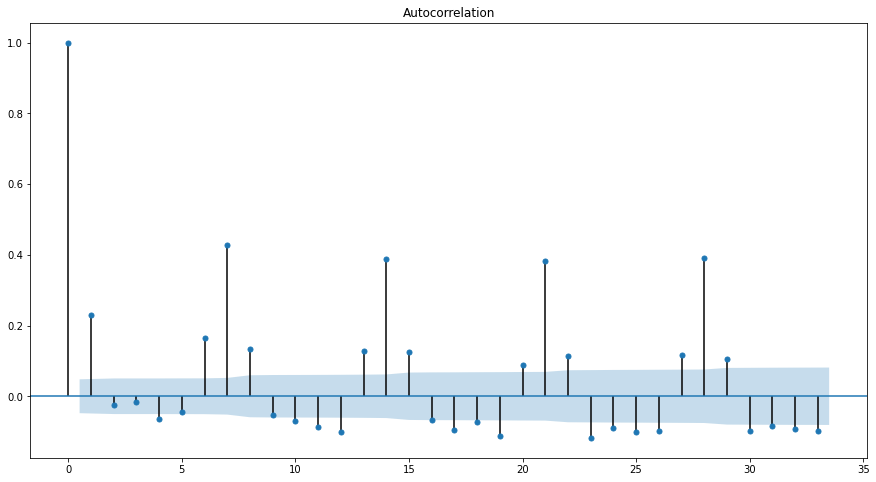

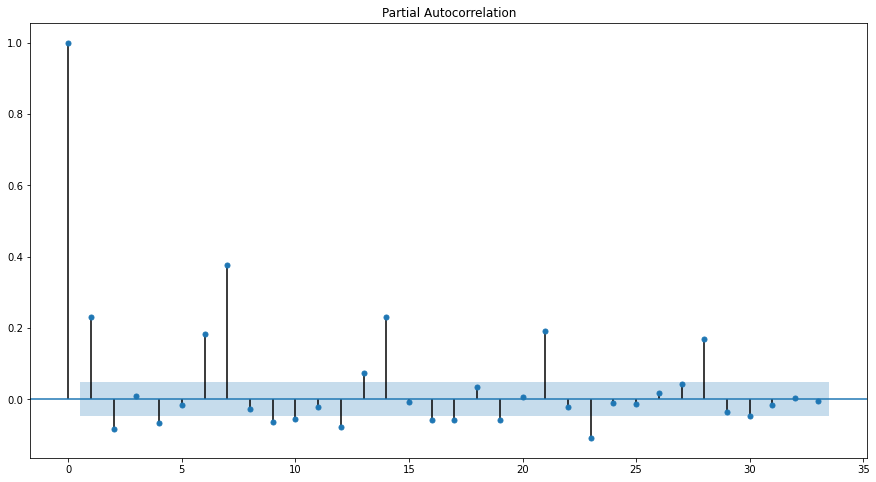

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df);
plot_pacf(df);

### Multiple Lag scatter

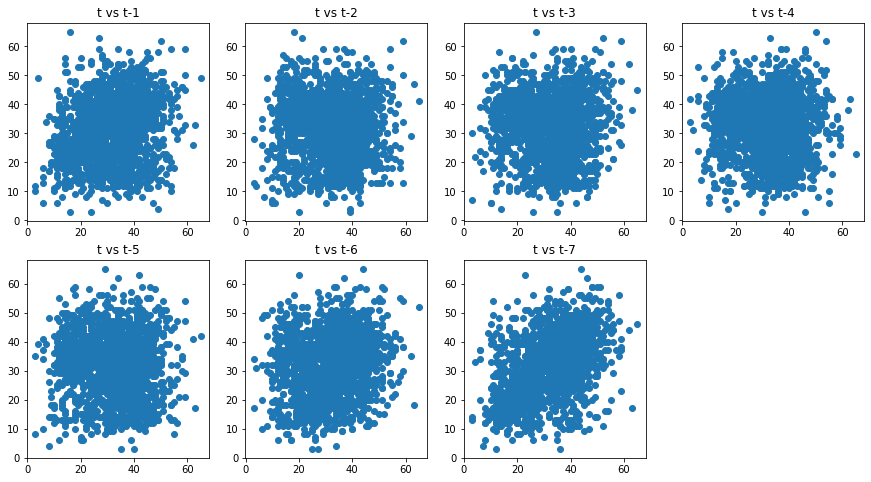

In [113]:
 def createLagDf(df, lags=7):
        columns = [df]
        for i in range(1,(lags + 1)):
            columns.append(values.shift(i))
        lag_df = pd.concat(columns, axis=1)
        columns = ['t']
        for i in range(1,(lags + 1)):
            columns.append('t-' + str(i))
        lag_df.columns = columns
        pyplot.figure(1)
        return lag_df

lag_df = createLagDf(df)
for i in range(1,8):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

## 1.2: Stationary
* Is the series stationary? based on which analysis?

### Check histogram and plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265BDD18B20>]],
      dtype=object)

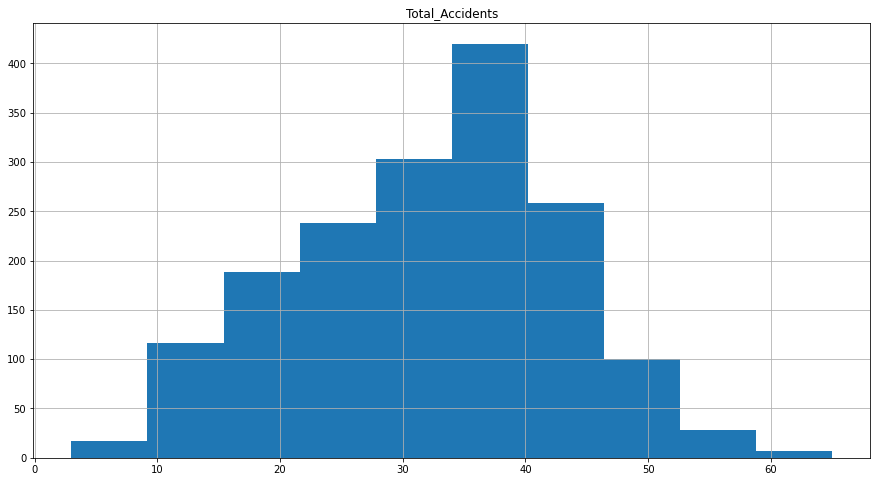

In [124]:
df.hist()

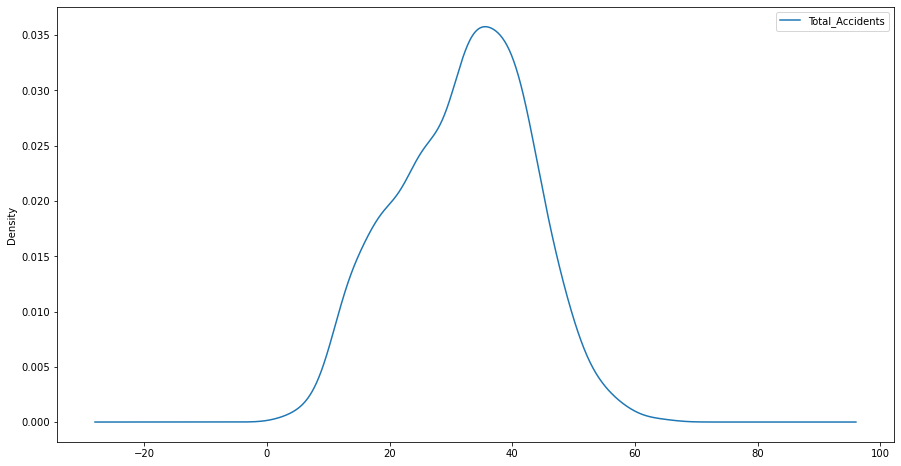

In [134]:
df.plot(kind='kde')

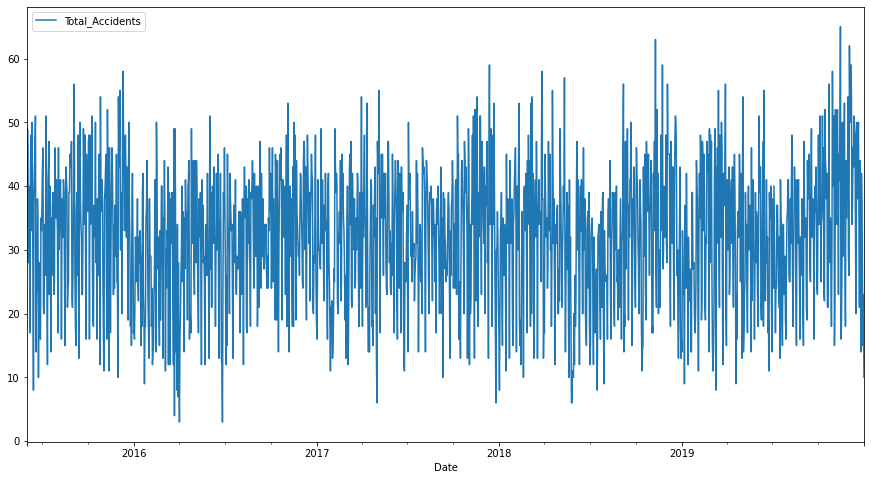

In [125]:
df.plot()

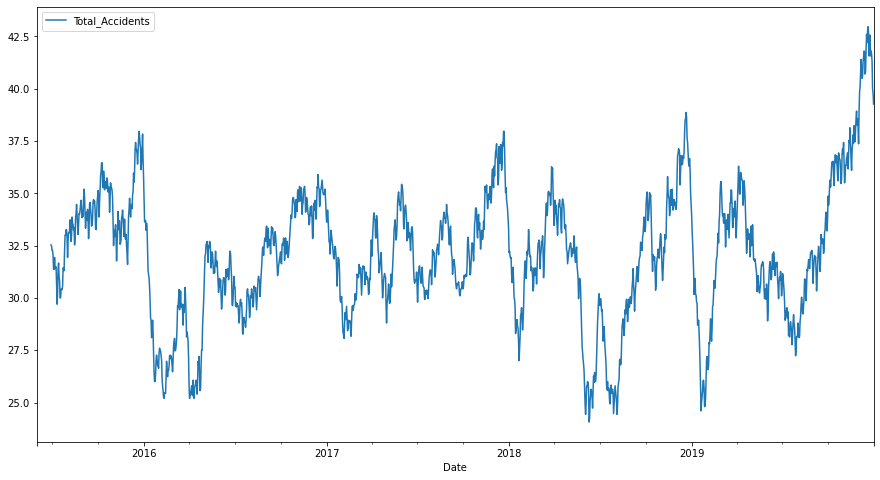

In [126]:
df.rolling(window=30).mean().plot()

### Split the dataset in two subsets

In [127]:
X = df.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

print(pd.DataFrame(X1).describe())
print(50*"*")
print(pd.DataFrame(X2).describe())

                0
count  837.000000
mean    31.839904
std     10.299495
min      3.000000
25%     25.000000
50%     33.000000
75%     40.000000
max     58.000000
**************************************************
                0
count  838.000000
mean    32.357995
std     11.275660
min      6.000000
25%     24.000000
50%     33.000000
75%     41.000000
max     65.000000


### Augmented Dickey-Fuller test
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value ≤ 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [128]:
from statsmodels.tsa.stattools import adfuller

X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.605544
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## 1.3 Other statistical analysis
* analyse each year 2016-2019
* Time Series Components: Level, Trend, Seasonality and Noise

### 2016-2019

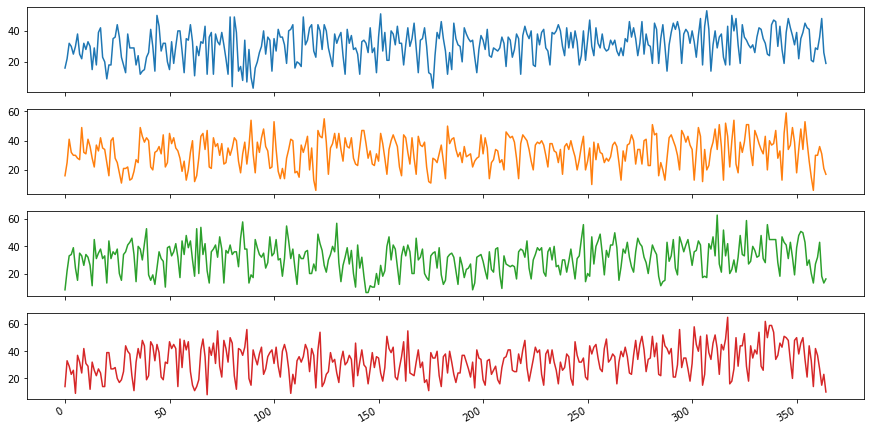

In [143]:
groups = df[df.index > '2016'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = years[name.year] = [x[0] for x in group.values.tolist()]
years.plot(subplots=True, legend=False)
pyplot.show()

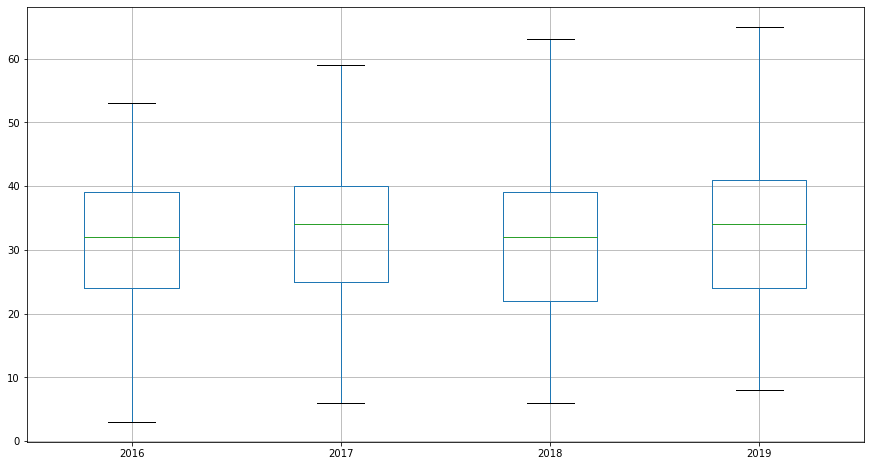

In [144]:
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = [x[0] for x in group.values.tolist()]
years.boxplot()
pyplot.show()

### Time Series Components: Level, Trend, Seasonality and Noise

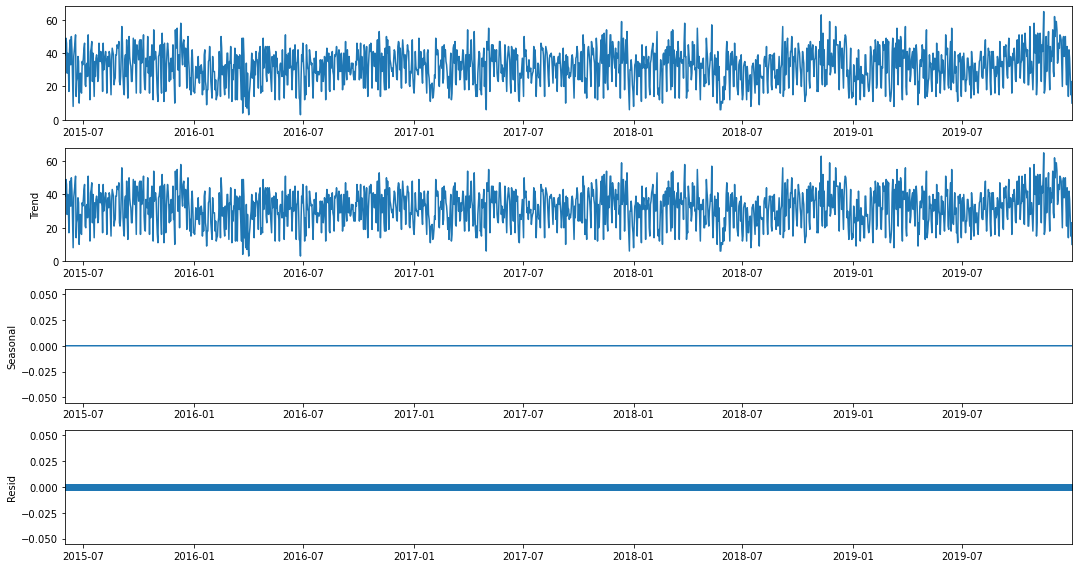

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive', period=1)
result.plot();

# Save dataset

In [148]:
df.to_csv('../dataset/acidentes_2015-2019.csv')